#Keystone Biotech
   #Team Lambda
#Method Data Science - Cohort 2    



In [76]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
#using RandomForestClassifier to find the important features and train the model
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.metrics import f1_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [22]:
#import outcomes dataset after study held
dataset = pd.read_csv('outcomes99.csv').drop(['version'],axis=1)
dataset.head()

,id,V99RNTCNT,V99ERKDATE,V99ERKFLDT,V99ERKRPCF,V99ERKTLPR,V99ERKTPPR,V99ERKBLRP,V99ERKVSRP,V99ERKPODX,...,V99ELNJSLP,V99ELJSTFP,V99ELJSFW,V99ELJSLW,V99ELNJSLW,V99ELJSTFW,V99EDDCF,V99EDDDATE,V99EDDFLDT,V99EDDVSPR
0,9000099,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,6.0,0.0,1.0,NaN,NaN,NaN,NaN
1,9000296,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,0.0,0.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN
2,9000622,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2006-12-06,1.0,1.0
3,9000798,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9001104,3.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


In [23]:
"""Important Variable  description
RPCF: Knee and hip replacement status during follow-up
KVSPR: Closest OAI contact prior to Knee replacement"""

updated_outcome = dataset[['id'] + ['V99ERKRPCF' ,'V99ELKRPCF' ,'V99ERHRPCF' ,'V99ELHRPCF' ,'V99ERKVSPR' ,'V99ELKVSPR'] ]

In [24]:
updated_outcome.head()

,id,V99ERKRPCF,V99ELKRPCF,V99ERHRPCF,V99ELHRPCF,V99ERKVSPR,V99ELKVSPR
0,9000099,NaN,NaN,NaN,NaN,NaN,NaN
1,9000296,NaN,NaN,NaN,NaN,NaN,NaN
2,9000622,NaN,NaN,NaN,NaN,NaN,NaN
3,9000798,NaN,NaN,NaN,NaN,NaN,NaN
4,9001104,NaN,NaN,NaN,3.0,NaN,NaN


In [25]:
updated_outcome.describe()

,id,V99ERKRPCF,V99ELKRPCF,V99ERHRPCF,V99ELHRPCF,V99ERKVSPR,V99ELKVSPR
count,4.796000e+03,276.000000,272.000000,120.000000,114.000000,276.000000,271.000000
mean,9.513826e+06,2.949275,2.952206,2.916667,2.859649,6.126812,5.937269
std,2.794781e+05,0.303254,0.287364,0.401328,0.495595,3.023882,2.904615
min,9.000099e+06,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,9.283430e+06,3.000000,3.000000,3.000000,3.000000,5.000000,3.000000
50%,9.522042e+06,3.000000,3.000000,3.000000,3.000000,7.000000,6.000000
75%,9.747572e+06,3.000000,3.000000,3.000000,3.000000,9.000000,8.000000
max,9.999878e+06,3.000000,3.000000,3.000000,3.000000,10.000000,10.000000


In [26]:
#Add last visited column and fill nan with 10
updated_outcome['last_visit']=updated_outcome[['V99ERKVSPR','V99ELKVSPR']].max(axis=1).fillna(10)

In [27]:
updated_outcome['last_visit'].describe()

count    4796.000000
mean        9.654295
std         1.411322
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: last_visit, dtype: float64

In [28]:
fd0 = pd.read_csv('allclinical01.csv').drop(['VERSION'],axis=1)
fd1 = pd.read_csv('allclinical02.csv').drop(['VERSION'],axis=1) 
fd2 = pd.read_csv('allclinical03.csv').drop(['VERSION'],axis=1)
fd3 = pd.read_csv('allclinical04.csv').drop(['VERSION'],axis=1) 
fd4 = pd.read_csv('allclinical05.csv').drop(['VERSION'],axis=1) 
fd5 = pd.read_csv('allclinical06.csv').drop(['VERSION'],axis=1) 
fd6 = pd.read_csv('allclinical07.csv').drop(['VERSION'],axis=1) 
fd7 = pd.read_csv('allclinical08.csv').drop(['VERSION'],axis=1) 
fd8 = pd.read_csv('allclinical09.csv').drop(['VERSION'],axis=1) 
fd9 = pd.read_csv('allclinical10.csv').drop(['VERSION'],axis=1) 
fd10 = pd.read_csv('allclinical11.csv').drop(['VERSION'],axis=1)

In [29]:
fd0.head()

,ID,V01BLDRAW2,V01ILLPWK2,V01MULTST2,V01URINOB1,V01PLAQHR1,V01BLUPMN2,V01HOURSP2,V01VCOLL2,V01ILLPWK1,...,V01PA330CV,V01PA130CV,V01CEMPLOY,V01PASE,V01AGE,V01PA430CV,V01PA230CV,V01WKHR7CV,V01VISITYP,V01visdys
0,9000099,NaN,NaN,NaN,1.0,33600.0,NaN,NaN,NaN,0.0,...,0.0,0.0,1.0,119.0,60.0,3.0,0.0,50.0,1.0,370.0
1,9000296,NaN,NaN,NaN,1.0,41040.0,NaN,NaN,NaN,0.0,...,0.0,3.0,1.0,190.0,70.0,1.0,0.0,40.0,1.0,393.0
2,9000622,NaN,NaN,NaN,1.0,36000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,4.0,118.0,72.0,3.0,4.0,0.0,1.0,367.0
3,9000798,NaN,NaN,NaN,1.0,37620.0,NaN,NaN,NaN,0.0,...,0.0,0.0,1.0,285.0,58.0,4.0,2.0,40.0,1.0,420.0
4,9001104,NaN,NaN,NaN,1.0,33000.0,NaN,NaN,NaN,0.0,...,0.0,0.0,4.0,157.0,73.0,1.0,0.0,0.0,1.0,370.0


In [30]:
#remove version no. from the column name and add visit number column to dataset and concatenate all datasets
fds = [fd0,fd1,fd2,fd3,fd4,fd5,fd6,fd7,fd8,fd9,fd10]
for i in range(len(fds)):
    x = fds[i]
    col = list(x.columns)
    for j in range(1,len(col)):
        txtcol = col[j]
        col[j] = txtcol[3:]
    x.columns=col
    x['visit'] = i #adding visit column to specify visit no. 


In [31]:
f_data=pd.concat(fds, sort=False)
f_data.head()

,ID,BLDRAW2,ILLPWK2,MULTST2,URINOB1,PLAQHR1,BLUPMN2,HOURSP2,VCOLL2,ILLPWK1,...,ACT36C,ACT36D,ACT37A,ACT37B,ACT37C,ACT37D,ACTNAA,ACTNAB,ACTNAC,ACTNAD
0,9000099,NaN,NaN,NaN,1.0,33600.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9000296,NaN,NaN,NaN,1.0,41040.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9000622,NaN,NaN,NaN,1.0,36000.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9000798,NaN,NaN,NaN,1.0,37620.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9001104,NaN,NaN,NaN,1.0,33000.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
f_data_v = f_data.merge(updated_outcome[['last_visit','id']],left_on='ID', right_on='id', how='outer')

In [33]:
f_data_v.head()

,ID,BLDRAW2,ILLPWK2,MULTST2,URINOB1,PLAQHR1,BLUPMN2,HOURSP2,VCOLL2,ILLPWK1,...,ACT37A,ACT37B,ACT37C,ACT37D,ACTNAA,ACTNAB,ACTNAC,ACTNAD,last_visit,id
0,9000099,NaN,NaN,NaN,1.0,33600.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9000099
1,9000099,NaN,NaN,NaN,1.0,27300.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9000099
2,9000099,NaN,NaN,NaN,1.0,53700.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9000099
3,9000099,NaN,NaN,NaN,1.0,29700.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9000099
4,9000099,NaN,NaN,NaN,1.0,27600.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9000099


In [34]:
f_data_v['total_visits'] = np.abs(f_data_v['last_visit'] - f_data_v['visit'])

In [35]:
f_data_v = f_data_v.drop(['id','visit','last_visit'],axis=1)
drop1=list(f_data_v.dtypes[f_data_v.dtypes == 'object'].keys())
drop2=['SREPLKR', 'SREPRKR', 'SREPLHR', 'SREPHR', 'SREPRHR']
drop_f=drop1+drop2
f_data_v = f_data_v.drop(drop_f,axis=1)

In [37]:
f_data_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43946 entries, 0 to 43945
Columns: 1397 entries, ID to total_visits
dtypes: float64(1396), int64(1)
memory usage: 468.7 MB


In [39]:
final_dataset = f_data_v.merge(updated_outcome[['V99ERKRPCF' ,'V99ELKRPCF' ,'V99ERHRPCF' ,'V99ELHRPCF','id']], left_on='ID', right_on='id', how='outer')

In [41]:
targets=final_dataset[['V99ERKRPCF' ,'V99ELKRPCF' ,'V99ERHRPCF' ,'V99ELHRPCF']]
final_dataset = final_dataset.drop(['ID','id','V99ERKRPCF' ,'V99ELKRPCF' ,'V99ERHRPCF' ,'V99ELHRPCF'] ,axis=1)
features= pd.get_dummies(final_dataset.fillna(-1))
t_target = targets.sum(axis=1).fillna(0)  
t_target[t_target >= 1] = 1

In [42]:
x_train, x_test, y_train, y_test= train_test_split(features, t_target, test_size = 0.20, random_state = 0)

In [43]:
#prediction on baseline parameters
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [44]:
#We will use AUC (Area Under Curve) as the evaluation metric

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5730781410544636

In [52]:
#using gridsearchCV for best parameters of RFC
"""from sklearn.model_selection import GridSearchCV

gridsearch_forest = RandomForestClassifier(random_state=0, n_jobs=-1)

params = {
    'n_estimators': [200, 500, 1000, 1500, 2000],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']

}

clf = GridSearchCV(gridsearch_forest, param_grid=params, cv=5 )
clf.fit(x_train,y_train)


clf"""


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500, 1000, 1500, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
"""clf.best_params_"""

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 2000}

In [49]:
"""clf.best_score_"""

0.8741039936283992

In [68]:
rfc1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 2000, n_jobs=-1 ,max_depth=8, criterion='gini')
rfc1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
sfm = SelectFromModel(rfc1, threshold=None)

# Train the selector
sfm.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [58]:
feat_labels=list(x_train.columns)
imp_features=[]
for feature_list_index in sfm.get_support(indices=True):
    imp_features.append(feat_labels[feature_list_index])

In [65]:
for feature in zip(x_train.columns
                   , rfc1.feature_importances_):
    print(feature)

('BLDRAW2', 5.3018215590709686e-05)
('ILLPWK2', 2.8226375754573412e-05)
('MULTST2', 2.5524469260908158e-05)
('URINOB1', 0.0001187737221320862)
('PLAQHR1', 0.0011472564272362337)
('BLUPMN2', 3.945048933420669e-05)
('HOURSP2', 4.086166645711041e-05)
('VCOLL2', 2.372760160102687e-05)
('ILLPWK1', 0.00019352323292791344)
('MULTST1', 0.00025070295783203607)
('VEIN2', 2.2416884414211012e-05)
('URUPMN2', 2.181825290299435e-05)
('VCOLL1', 0.0001613145478059837)
('HOURSP1', 0.0007808128270467341)
('HRSUC1', 0.0013416556428494286)
('URNCOLL', 0.0005567725152659997)
('EXCESS2', 2.17740358781181e-05)
('BLDRAW1', 0.00016432166863901716)
('URINHR1', 0.0012653417771679126)
('HRSUC2', 2.297033409099482e-05)
('QOVP1', 0.00021782754969682801)
('EXCESS1', 0.00023541860154866325)
('BLDCOLL', 0.000515766868904593)
('SEAQHR1', 0.0011207713412495282)
('VOID1', 0.0005253077402500683)
('QOVP2', 3.225158243970913e-05)
('VEIN1', 0.00020639158386617706)
('OTHVP1', 0.00023598342374217613)
('SEAQHR2', 1.202201493291

('A3PCAR1', 6.740780024148542e-05)
('WLKAR1', 9.509560225848889e-05)
('WKYRAR1', 4.3968209608491225e-05)
('WKMOAR1', 5.168818327272414e-05)
('WKTMAR1', 4.950332527092695e-05)
('NOAYAR2', 2.9675559337950458e-05)
('AC1AR2', 0.0002206289623954906)
('NOA1AR2', 0.0)
('A1YRAR2', 6.910810100875724e-05)
('A1MOAR2', 7.38506658072517e-05)
('A1TMAR2', 8.05089419895269e-05)
('A1PCAR2', 5.873555275165793e-05)
('AC2AR2', 0.00017886120099703926)
('NOA2AR2', 2.2495953315385604e-05)
('A2YRAR2', 5.4093645415930206e-05)
('A2MOAR2', 8.344045552106338e-05)
('A2TMAR2', 8.100656862154582e-05)
('A2PCAR2', 5.529985500097191e-05)
('AC3AR2', 0.00015259142239269587)
('NOA3AR2', 2.4556032930876738e-05)
('A3YRAR2', 5.72978413847592e-05)
('A3MOAR2', 5.632666843110302e-05)
('A3TMAR2', 4.677561422929969e-05)
('A3PCAR2', 4.020398300394685e-05)
('WLKAR2', 9.044411336407598e-05)
('WKYRAR2', 4.497873622302632e-05)
('WKMOAR2', 5.8644902682647715e-05)
('WKTMAR2', 4.9555552748832385e-05)
('NOAYAR3', 3.160665775326495e-05)
('

In [62]:
len(imp_features)

229

In [66]:
#feature set using important features
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

In [69]:
rfc1_important=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 2000, n_jobs=-1 ,max_depth=8, criterion='gini')
rfc1_important.fit(x_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

roc_auc:   0.5186005314437555 accuracy_score:   0.8763367463026166


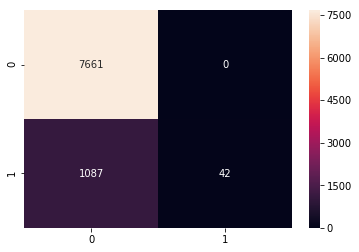

In [77]:
#with all features
y_pred_p = rfc1.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_p)
roc_auc_p = auc(false_positive_rate, true_positive_rate)
print("roc_auc:  ",roc_auc_p,"accuracy_score:  " ,accuracy_score(y_test, y_pred_p))
cm = confusion_matrix(y_test,y_pred_p)
sns.heatmap(cm,annot=True,fmt="d")

roc_auc:   0.5459792035604396 accuracy_score:   0.8825938566552901


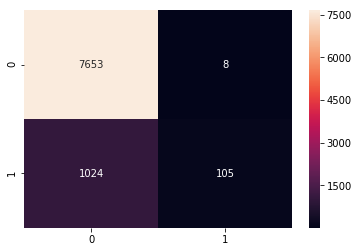

In [78]:
#with all features
y_pred_i = rfc1_important.predict(x_important_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_i)
roc_auc_i = auc(false_positive_rate, true_positive_rate)
print("roc_auc:  ",roc_auc_i,"accuracy_score:  " ,accuracy_score(y_test, y_pred_i))
cm = confusion_matrix(y_test,y_pred_i)
sns.heatmap(cm,annot=True,fmt="d")

In [79]:
rfc1_important_1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 1000, n_jobs=-1 ,max_depth=None, criterion='gini')
rfc1_important_1.fit(x_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

roc_auc:   0.6240268397248369 accuracy_score:   0.9014789533560864


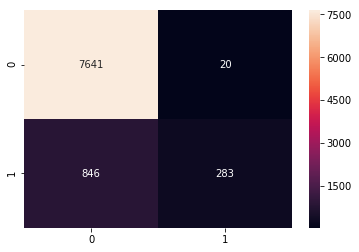

In [81]:
y_pred_i1 = rfc1_important_1.predict(x_important_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_i1)
roc_auc_i1 = auc(false_positive_rate, true_positive_rate)
print("roc_auc:  ",roc_auc_i1,"accuracy_score:  " ,accuracy_score(y_test, y_pred_i1))
cm = confusion_matrix(y_test,y_pred_i1)
sns.heatmap(cm,annot=True,fmt="d")